In [60]:
#load the libraries and titanic data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

gender = pd.read_csv('./gender_submission.csv')
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [33]:
#print the dataset shape
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


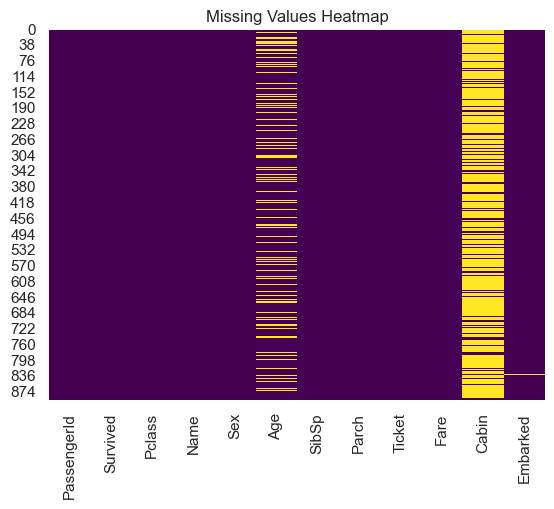

In [34]:
#plot the NaN values with a heatmap
sns.heatmap(train.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [35]:
#print the age % of NaN values
total_rows = len(train)
nan_count = train['Age'].isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

print (nan_percentage)

19.865319865319865


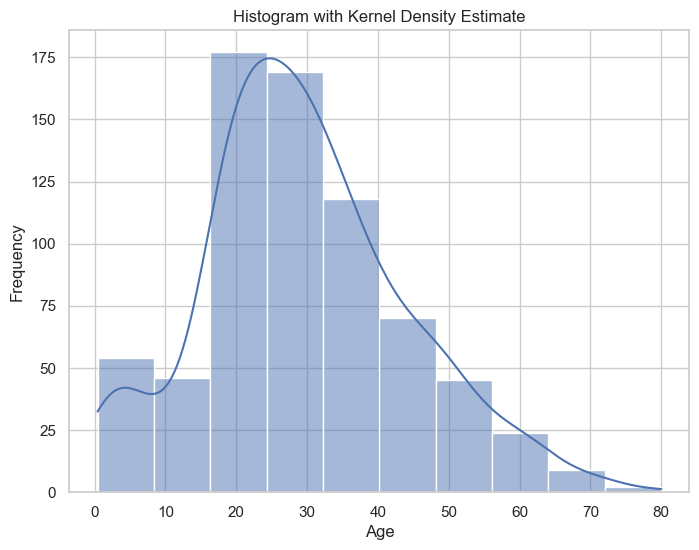

In [36]:
#print the histogram of the age column
plt.figure(figsize=(8, 6))
sns.histplot(train['Age'].dropna(), bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram with Kernel Density Estimate')
plt.show()


In [37]:
# Calculate and print the median and mean of the 'age' column
age_median = train['Age'].median()
age_mean = train['Age'].mean()

print(f"Median age: {age_median:.2f}")
print(f"Mean age: {age_mean:.2f}")

Median age: 28.00
Mean age: 29.70


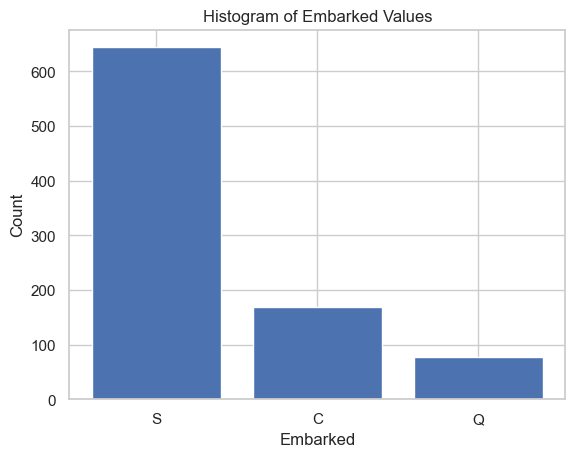

In [38]:
embarked_distribution = train['Embarked'].value_counts()

# Plot the histogram of embarked values
plt.bar(embarked_distribution.index, embarked_distribution.values)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Histogram of Embarked Values')
plt.show()

In [39]:
# Fill missing 'Age' values with the median age
median_age = train['Age'].median()
train['Age'].fillna(median_age, inplace=True)

# Fill missing 'Embarked' values with the most common value ('S')
most_common_embarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(most_common_embarked, inplace=True)


In [40]:
#Check result 
missing_values = train.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [41]:
#create the feature 'TravelAlone'
train['TravelAlone'] = (train['SibSp'] + train['Parch'] == 0).astype(int)
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  TravelAlone  
0      0         A/5 21171   7.2500   NaN        S            0  
1      0          PC 17599  71.2833   C85        C            0  
2      0  STON/O2. 3101282   7.9250   NaN        S            1  
3      0            113803  53.1000  C123        S      

In [42]:
# Use the get_dummies function to encode the categorical features
data = pd.get_dummies(train, columns=['Pclass', 'Embarked', 'Sex'], drop_first=False)
print(data.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  TravelAlone  Pclass_1  \
0  22.0      1      0         A/5 21171   7.2500   NaN            0         0   
1  38.0      1      0          PC 17599  71.2833   C85            0         1   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN            1         0   
3  35.0      1      0            113803  53.1000  C123            0         1   
4  35.0      0      0            373450   8.0500   NaN            1         0   

   Pclass_2  Pclass_3  Embarked_C  Emb

In [43]:
#drop the columns that you don't need
titanic_filtered = data.drop(columns=['PassengerId', 'Name', 'Ticket'])
print(titanic_filtered)

     Survived   Age  SibSp  Parch     Fare Cabin  TravelAlone  Pclass_1  \
0           0  22.0      1      0   7.2500   NaN            0         0   
1           1  38.0      1      0  71.2833   C85            0         1   
2           1  26.0      0      0   7.9250   NaN            1         0   
3           1  35.0      1      0  53.1000  C123            0         1   
4           0  35.0      0      0   8.0500   NaN            1         0   
..        ...   ...    ...    ...      ...   ...          ...       ...   
886         0  27.0      0      0  13.0000   NaN            1         0   
887         1  19.0      0      0  30.0000   B42            1         1   
888         0  28.0      1      2  23.4500   NaN            0         0   
889         1  26.0      0      0  30.0000  C148            1         1   
890         0  32.0      0      0   7.7500   NaN            1         0   

     Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_female  \
0           0         1 

In [44]:
#do the same thing for the test dataset
test['Age'].fillna(test['Age'].median(), inplace=True)
most_common_embarked_test = test['Embarked'].value_counts().idxmax()
test['Embarked'].fillna(most_common_embarked_test, inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['TravelAlone'] = (test['SibSp'] + test['Parch'] == 0).astype(int)
categorical_features = ['Pclass', 'Embarked', 'Sex']
titanic_encoded_test = pd.get_dummies(test, columns=categorical_features, drop_first=False)
columns_to_drop_test = ['PassengerId', 'Name', 'Ticket']
titanic_filtered_test = titanic_encoded_test.drop(columns=columns_to_drop_test)
missing_values_test = titanic_filtered_test.isnull().sum()
print("From DATA TEST : ")
print(missing_values_test)
print(titanic_filtered.head())

From DATA TEST : 
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          327
TravelAlone      0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64
   Survived   Age  SibSp  Parch     Fare Cabin  TravelAlone  Pclass_1  \
0         0  22.0      1      0   7.2500   NaN            0         0   
1         1  38.0      1      0  71.2833   C85            0         1   
2         1  26.0      0      0   7.9250   NaN            1         0   
3         1  35.0      1      0  53.1000  C123            0         1   
4         0  35.0      0      0   8.0500   NaN            1         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_female  \
0         0         1           0           0           1           0   
1         0         0           1           0           0           1   
2         0         1           0           0

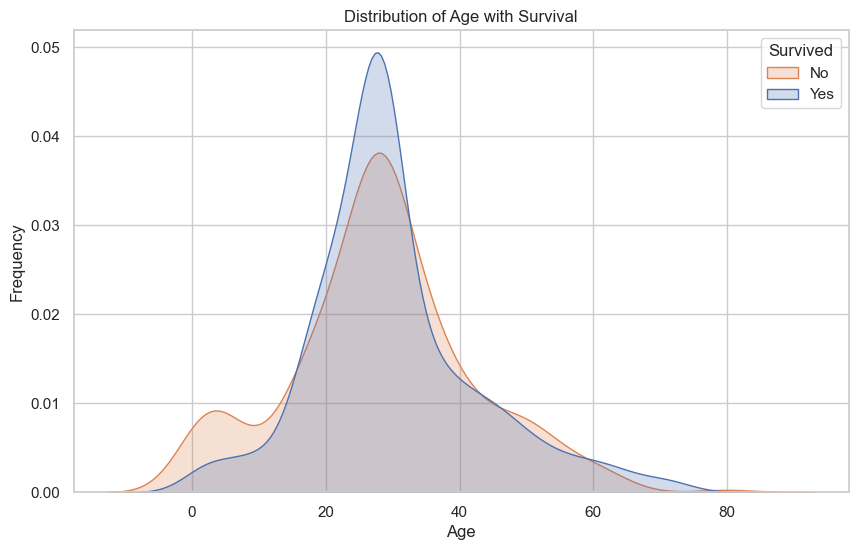

In [45]:
#print the age feature distribution and highlight the survived feature
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic_filtered, x='Age', hue='Survived', fill=True, common_norm=False)
plt.title("Distribution of Age with Survival")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.savefig("age_feature_distributio.png")

In [46]:
#add the "IsMinor" variable to your data (a person is considered a minor if they are under 16)
titanic_filtered['IsMinor'] = (titanic_filtered['Age'] < 16).astype(int)
print(titanic_filtered.head())
#fonction pour les plots
def plot_survivors(data, feature_columns, feature_labels, title, filename, palette=None):
    survivors = [data[data[col] == 1]['Survived'].sum() for col in feature_columns]
    sns.barplot(x=feature_labels, y=survivors, palette=palette)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Number of Survivors')
    plt.savefig(filename)

   Survived   Age  SibSp  Parch     Fare Cabin  TravelAlone  Pclass_1  \
0         0  22.0      1      0   7.2500   NaN            0         0   
1         1  38.0      1      0  71.2833   C85            0         1   
2         1  26.0      0      0   7.9250   NaN            1         0   
3         1  35.0      1      0  53.1000  C123            0         1   
4         0  35.0      0      0   8.0500   NaN            1         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  Sex_female  \
0         0         1           0           0           1           0   
1         0         0           1           0           0           1   
2         0         1           0           0           1           1   
3         0         0           0           0           1           1   
4         0         1           0           0           1           0   

   Sex_male  IsMinor  
0         1        0  
1         0        0  
2         0        0  
3         0        0  
4      

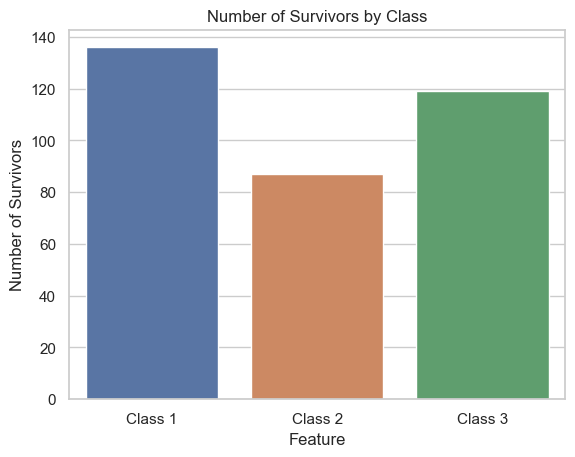

In [47]:
# for Pclass
feature_columns_class = ['Pclass_1', 'Pclass_2', 'Pclass_3']
feature_labels_class = ['Class 1', 'Class 2', 'Class 3']
plot_survivors(titanic_filtered, feature_columns_class, feature_labels_class, 
              'Number of Survivors by Class', "survivors_by_pclass.png")

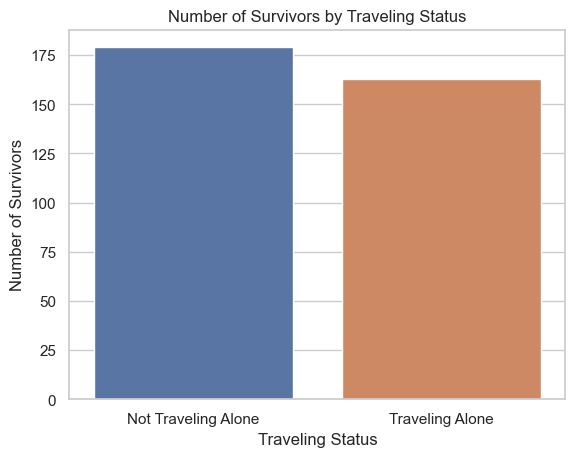

In [48]:
# for Traveling Alone feature
feature_labels_alone = ['Not Traveling Alone', 'Traveling Alone']
travel_alone_survivors = titanic_filtered['Survived'].sum() - titanic_filtered[titanic_filtered['TravelAlone'] == 0]['Survived'].sum()
not_travel_alone_survivors = titanic_filtered[titanic_filtered['TravelAlone'] == 0]['Survived'].sum()
sns.barplot(x=feature_labels_alone, y=[not_travel_alone_survivors, travel_alone_survivors])
plt.title('Number of Survivors by Traveling Status')
plt.xlabel('Traveling Status')
plt.ylabel('Number of Survivors')
plt.savefig("survivors_by_travel_alone.png")

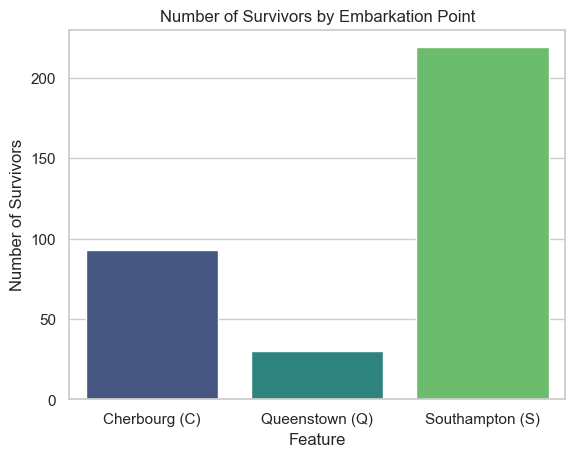

In [49]:
# for Embarked
feature_columns_embarked = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
feature_labels_embarked = ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)']
plot_survivors(titanic_filtered, feature_columns_embarked, feature_labels_embarked, 
              'Number of Survivors by Embarkation Point', "survivors_by_embarked.png", "viridis")

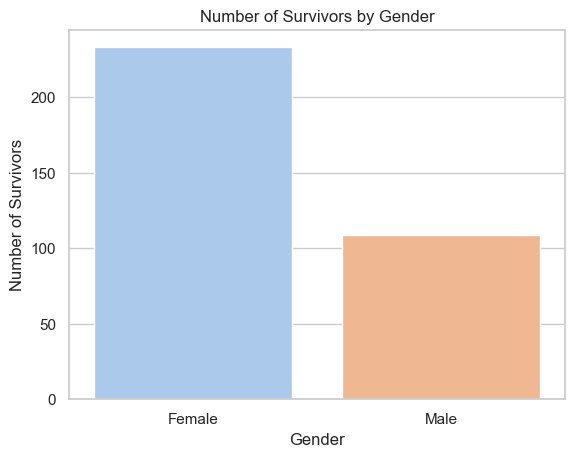

In [50]:
# for Gender distribution of survivors
feature_labels_gender = ['Female', 'Male']
female_survivors = titanic_filtered[titanic_filtered['Sex_female'] == 1]['Survived'].sum()
male_survivors = titanic_filtered[titanic_filtered['Sex_male'] == 1]['Survived'].sum()
sns.barplot(x=feature_labels_gender, y=[female_survivors, male_survivors], palette="pastel")
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.savefig("survivors_by_gender.png")

Logistic Regression with scikit-learn

In [57]:
#define x "features" and y "target" for the model
features = titanic_filtered.drop(['Survived'], axis=1)
target = titanic_filtered["Survived"]

In [58]:
#instanciate a LogisticRegression estimator in sklearn
logreg = LogisticRegression(max_iter=1000)